In [609]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [610]:
import nltk

In [611]:
df =pd.read_csv('Student+Alumni.csv') # Read the data
df = df.dropna()

In [612]:
df.head()

,count,maj,import_status,user_type
0,1,Bachelors of Science in Computer Engineering,joined,alumni
1,1,Management Science,joined,student
2,1,Management Science,joined,alumni
3,72,Animal Husbandry,joined,alumni
4,12,Animal Husbandry,joined,student


In [613]:
# Naive Function for grouping similarly named Majors
def create_grouped_filter(x):
    for i in x.split():
        if i.lower() == 'chemistry':
            return 'Chemistry'
        elif i.lower() == 'mathematics'or i.lower() == 'mathematics,' or i.lower().startswith('math'):
            return 'Mathematics'
        elif i.lower() == 'business' or i.lower().startswith('bus') or i.lower().endswith('ness'):
            return "Business"
        elif i.strip().lower() == 'computer':
            return 'Computer Science'
        elif i.lower() == '17th':
            return 'Historical(17 Century)'
        elif i.lower() == 'engineering' or i.lower().endswith('eering'):
            return 'Engineering'
        elif i.lower() == 'biotechnology' or i.lower().startswith('biotechnology'):
            return 'Biotechnology'
        elif i.lower() == 'literature' or i.lower()=='english':
            return 'Literature'
        elif i.lower() == 'corporate':
            return 'Corporate Major'
        elif i.lower().startswith('pyschology'):
            return 'Pyschology'
        elif i.lower() == 'cyber' or i.lower() == 'security' or i.lower()=='cybersecurity':
            return 'Cyber Security'
        elif i.lower() == 'cosmetology'or i.lower().startswith('cosmetology'):
            return 'Cosmetology'
        elif i.lower() == 'counselling' or i.lower() == 'counseling'or  i.lower().startswith('counselling'):
            return 'Major in counselling'
        elif i.lower()=='accounting' or i.lower().startswith('acc'):
            return 'Accounting'
        elif i.lower()=='art' or i.lower().startswith('art'):
            return 'Arts'
        elif i.lower()=='chinese' or i.lower().startswith('chinese'):
            return 'Chinese History'
        elif i.lower()=='biology' or i.lower().startswith('biology'):
            return 'Biology'
        elif i.lower()=='biological' or i.lower().startswith('biological'):
            return 'Biological sciences'
        elif i.lower()=='behavior' or i.lower().startswith('behavior'):
            return 'Behavioral sciences'
        elif i.lower()=='cinema' or i.lower().startswith('cinema'):
            return 'Behavioral sciences'
        elif i.lower()=='communication' or i.lower().startswith('communication'):
            return 'Communications'
        elif i.lower()=='eco' or i.lower().startswith('econ') or i.endswith('mics'):
            return 'Economics'
        elif i.lower()=='healthcare' or i.lower().startswith('health'):
            return 'HealthCare'
        elif i.lower()=='education' or i.lower().startswith('edu'):
            return 'Education'
        elif i.lower()=='information' or i.lower().startswith('technology') or i.lower().startswith('inf'):
            return 'Information Technology'

        else :
            return x
        
        
    

In [614]:
df['maj']  = df['maj'].apply(create_grouped_filter)

In [615]:
df.tail()

,count,maj,import_status,user_type
9995,1,Business,joined,alumni
9996,1,CMIS/INFA,joined,alumni
9997,1,Business,joined,alumni
9998,1,Computer Science,joined,alumni
9999,1,Literature,joined,alumni


In [616]:
# df.groupby(['maj']).agg({'import_status':'count'}).sort_values(by='import_status',ascending=False)

In [617]:
df[df['maj'].isin(df['maj'].value_counts().index[0:10])].sample(5)

,count,maj,import_status,user_type
2952,1,Computer Science,joined,alumni
3802,1,Law,joined,alumni
4230,1,Law,joined,alumni
8282,1,Cyber Security,joined,alumni
8488,1,Information Technology,joined,alumni


In [618]:
def create_joined_students_column(i):
    return df[(df['maj']==i)&(df['user_type']=='student')]['import_status'].value_counts().get('joined')        
        
def create_joined_imported_students_column(i):
    return df[(df['maj']==i)&(df['user_type']=='student')].shape[0]
def create_joined_alumni_column(i):
    return df[(df['maj']==i)&(df['user_type']=='alumni')]['import_status'].value_counts().get('joined')
def create_joined_imported_alumni_column(i):
    return df[(df['maj']==i)&(df['user_type']=='alumni')].shape[0]

In [619]:
df['Total joined students'] = df['maj'].apply(create_joined_students_column)
df['Total joined+imported students'] =df['maj'].apply(create_joined_imported_students_column)
df['Total joined alumni'] = df['maj'].apply(create_joined_alumni_column)
df['Total joined+imported alumni'] = df['maj'].apply(create_joined_imported_alumni_column)


In [627]:
df.columns

Index(['count', 'maj', 'import_status', 'user_type', 'Total joined students',
       'Total joined+imported students', 'Total joined alumni',
       'Total joined+imported alumni'],
      dtype='object')

In [632]:
df.groupby(['maj','count'])[['maj','Total joined students','count',
       'Total joined+imported students', 'Total joined alumni',
       'Total joined+imported alumni']]

In [635]:
df_final.to_excel(r'C:\Users\amitb\Alumni_Student_Report.xlsx', index = False)

In [634]:
df_final = df.sort_values(by='count',ascending=False).fillna(1)

In [268]:
df[(df['maj']=='Business')&(df['user_type']=='alumni')]['import_status'].value_counts().get('joined')

534

In [269]:
df[(df['maj']=='Business')&(df['user_type']=='student')]['import_status'].value_counts().get('joined')

41

In [270]:
df[(df['maj']=='Business')&(df['user_type']=='alumni')].shape[0]

630

In [271]:
df[(df['maj']=='Business')&(df['user_type']=='student')].shape[0]

43

In [249]:
'Pyschology'.lower().startswith('pyschology')

True

In [250]:
df['maj'] = df['maj'].apply(create_grouped_filter)

In [623]:
# Getting the top 10 based on our filters
df[df['maj'].isin(df['maj'].value_counts().index[0:10])]['maj'].value_counts()

Business                  691
Computer Science          428
Economics                 426
Cyber Security            267
Psychology                265
Literature                230
Information Technology    224
Electrical Engineering    216
Political Science         215
Law                       201
Name: maj, dtype: int64

### Plotting the top 10 based on the filters

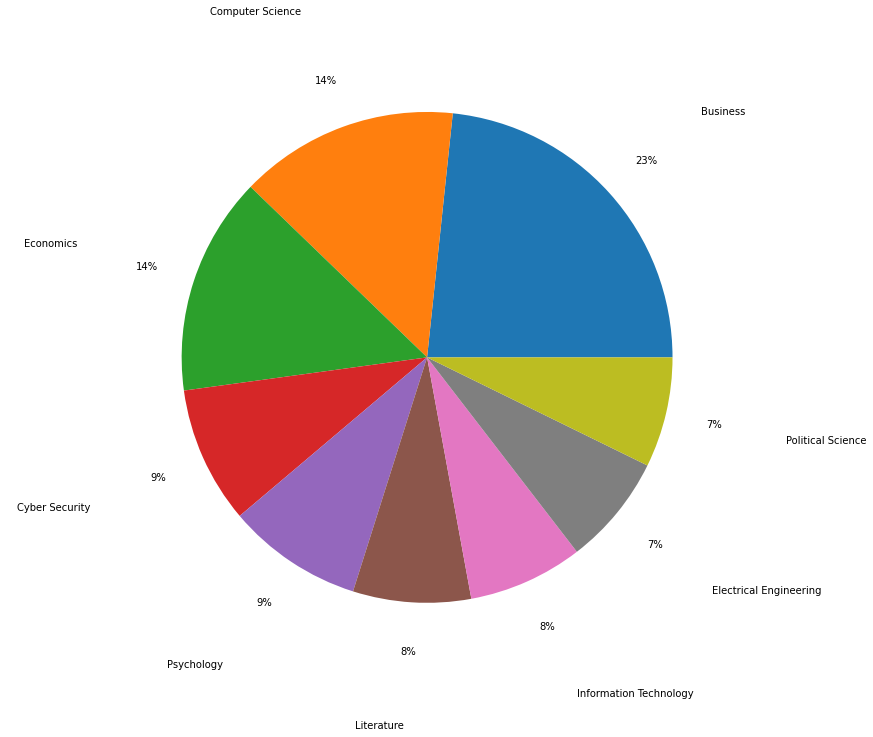

In [624]:
fig, ax = plt.subplots(figsize=(15,10))

labels = df[df['maj'].isin(df['maj'].value_counts().index[0:9])]['maj'].value_counts().index
percentages = df[df['maj'].isin(df['maj'].value_counts().index[0:9])]['maj'].value_counts().values
ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.5)
ax.axis('equal')
plt.show()